In [6]:
pip install --upgrade scipy


Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install scipy


Note: you may need to restart the kernel to use updated packages.


In [8]:
pip list --outdated


Package                           Version            Latest             Type
--------------------------------- ------------------ ------------------ -----
aiobotocore                       2.12.3             2.13.1             wheel
aiohttp                           3.9.5              3.10.1             wheel
aioitertools                      0.7.1              0.11.0             wheel
aiosignal                         1.2.0              1.3.1              wheel
alabaster                         0.7.16             1.0.0              wheel
altair                            5.0.1              5.3.0              wheel
annotated-types                   0.6.0              0.7.0              wheel
anyio                             4.2.0              4.4.0              wheel
archspec                          0.2.3              0.2.4              wheel
argon2-cffi                       21.3.0             23.1.0             wheel
arrow                             1.2.3              1.3.0       

In [10]:
pip install numpy pandas matplotlib seaborn scipy scikit-learn statsmodels


Note: you may need to restart the kernel to use updated packages.


Problem 1 Context CNBE, a prominent news channel, is gearing up to provide insightful coverage of recent elections, recognizing the importance of data-driven analysis. A comprehensive survey has been conducted, capturing the perspectives of 1525 voters across various demographic and socio-economic factors. This dataset encompasses 9 variables, offering a rich source of information regarding voters' characteristics and preferences.

Objective The primary objective is to leverage machine learning to build a predictive model capable of forecasting which political party a voter is likely to support. This predictive model, developed based on the provided information, will serve as the foundation for creating an exit poll. The exit poll aims to contribute to the accurate prediction of the overall election outcomes, including determining which party is likely to secure the majority of seats.

Data Description vote: Party choice: Conservative or Labour age: in years economic.cond.national: Assessment of current national economic conditions, 1 to 5. economic.cond.household: Assessment of current household economic conditions, 1 to 5. Blair: Assessment of the Labour leader, 1 to 5. Hague: Assessment of the Conservative leader, 1 to 5. Europe: an 11-point scale that measures respondents' attitudes toward European integration. High scores represent ‘Eurosceptic’ sentiment. political.knowledge: Knowledge of parties' positions on European integration, 0 to 3. gender: female or male.

1.1 Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it. Read the dataset

In [13]:
#import requrired libraries
import numpy as np
import pandas as pd

In [14]:
Election=pd.read_excel('D:/Ment Class/Practise11/Excel Data/Election.xlsx')

In [15]:
Election.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [16]:
Election.shape

(1525, 10)

In [17]:
Election.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


Inference:

The dataset has 1525 rows and 10 columns.

In [18]:
#removing or dropping unwanted variable
Election.drop(columns = 'Unnamed: 0',inplace = True)

In [19]:
numeric_columns = Election.select_dtypes(include=[np.number])
skewness = numeric_columns.skew()
print(skewness)

age                        0.144621
economic.cond.national    -0.240453
economic.cond.household   -0.149552
Blair                     -0.535419
Hague                      0.152100
Europe                    -0.135947
political.knowledge       -0.426838
dtype: float64


In [20]:
Election.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [21]:
#checking for null values
Election.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [22]:
#checking for duplicate values
Election.duplicated().sum()

8

In [23]:
#dropping duplicate values
Election.drop_duplicates(inplace=True)

In [24]:
Election.duplicated().sum()


0

Inference :

There are 8 duplicates presented in the dataset and they should be removed.

Descriptive Statistics

In [25]:
Election.describe(include = 'all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
vote,1517,2,Labour,1057,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1517.0,NaN,NaN,NaN,54.241266,15.701741,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1517.0,NaN,NaN,NaN,3.245221,0.881792,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1517.0,NaN,NaN,NaN,3.137772,0.931069,1.0,3.0,3.0,4.0,5.0
Blair,1517.0,NaN,NaN,NaN,3.335531,1.174772,1.0,2.0,4.0,4.0,5.0
Hague,1517.0,NaN,NaN,NaN,2.749506,1.232479,1.0,2.0,2.0,4.0,5.0
Europe,1517.0,NaN,NaN,NaN,6.740277,3.299043,1.0,4.0,6.0,10.0,11.0
political.knowledge,1517.0,NaN,NaN,NaN,1.540541,1.084417,0.0,0.0,2.0,2.0,3.0
gender,1517,2,female,808,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
# Converting necessary variables into object
Election[['economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']] = Election[['economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']].astype(object)

In [28]:
Election.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1517 non-null   object
 1   age                      1517 non-null   int64 
 2   economic.cond.national   1517 non-null   object
 3   economic.cond.household  1517 non-null   object
 4   Blair                    1517 non-null   object
 5   Hague                    1517 non-null   object
 6   Europe                   1517 non-null   object
 7   political.knowledge      1517 non-null   object
 8   gender                   1517 non-null   object
dtypes: int64(1), object(8)
memory usage: 118.5+ KB


In [29]:
#checking descriptive statistics again
Election.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
vote,1517,2,Labour,1057,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1517.0,NaN,NaN,NaN,54.241266,15.701741,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1517.0,5.0,3.0,604.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
economic.cond.household,1517.0,5.0,3.0,645.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Blair,1517.0,5.0,4.0,833.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hague,1517.0,5.0,2.0,617.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Europe,1517.0,11.0,11.0,338.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
political.knowledge,1517.0,4.0,2.0,776.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,1517,2,female,808,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Inference :

Rest of all the columns has object variables with ‘Europe’ being highest having 11 unique values The mean and median for the only integer column ‘age’ is almost same indicating the column is normally distributed. ‘vote’ have two unique values Labour and Conservative, which is also a dependent variable. ‘gender’ has two unique values male and female. We can come to a conclusion that the dataset has only one integer column which is ’age’ 1.2 Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers.

Univariate Analysis and Outlier Check

In [30]:
# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

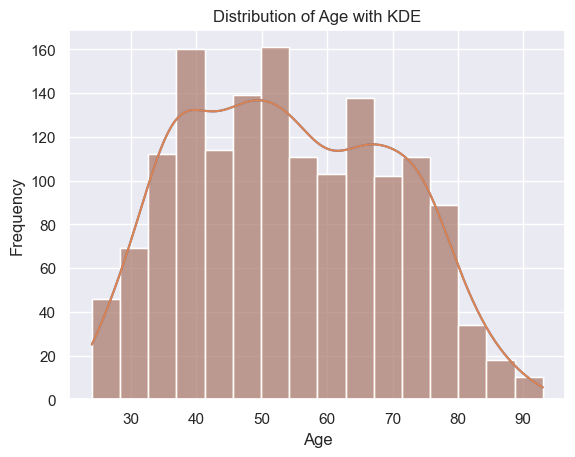

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example DataFrame and plot
sns.histplot(data=Election, x='age', kde=True)
plt.title('Distribution of Age with KDE')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

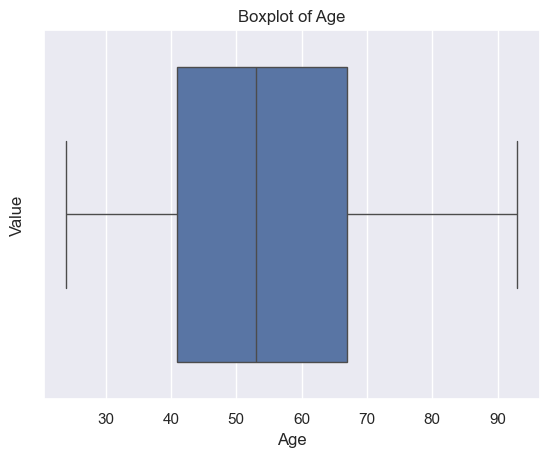

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example DataFrame and plot
sns.boxplot(data=Election, x='age')

# Add titles and labels
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.ylabel('Value')

# Show the plot
plt.show()

Inference:

‘age’ is the only integer variable and it is not having outliers. Also, the dist. plot shows that the variable is normally distributed.

1.1 Frequency distribution of the categorical variables.

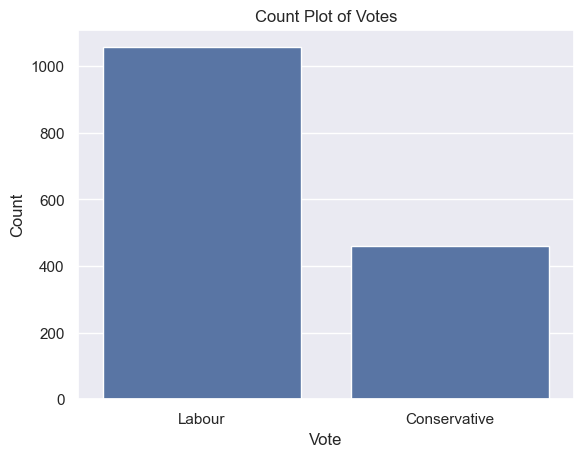

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the count plot
sns.countplot(data=Election, x='vote')

# Add titles and labels
plt.title('Count Plot of Votes')
plt.xlabel('Vote')
plt.ylabel('Count')

# Show the plot
plt.show()

Inference:

There are large number of voters in labour.

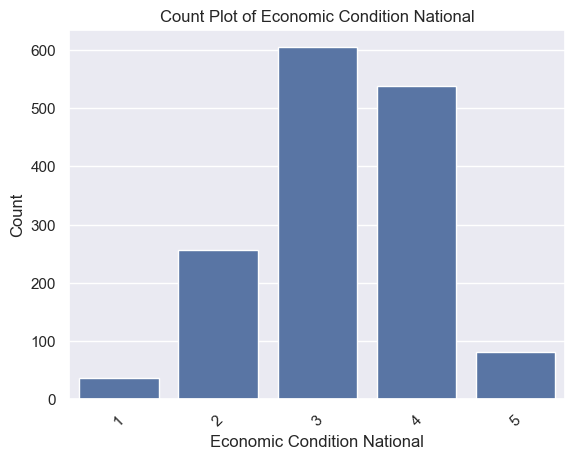

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the count plot
sns.countplot(data=Election, x='economic.cond.national')

# Add titles and labels
plt.title('Count Plot of Economic Condition National')
plt.xlabel('Economic Condition National')
plt.ylabel('Count')

# Show the plot
plt.xticks(rotation=45)  # Optional: Rotate x-axis labels if needed
plt.show()

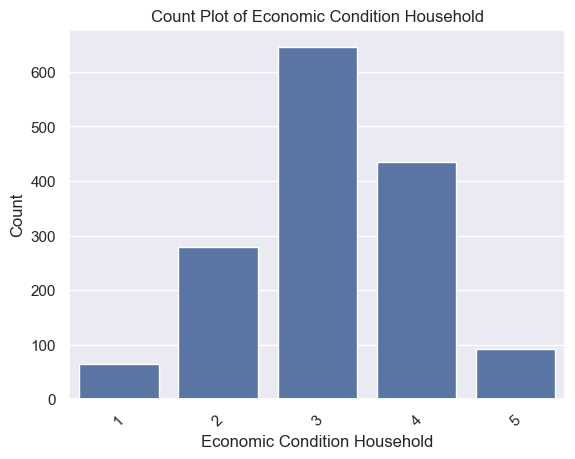

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the count plot
sns.countplot(data=Election, x='economic.cond.household')

# Add titles and labels
plt.title('Count Plot of Economic Condition Household')
plt.xlabel('Economic Condition Household')
plt.ylabel('Count')

# Show the plot
plt.xticks(rotation=45)  # Optional: Rotate x-axis labels if needed
plt.show()

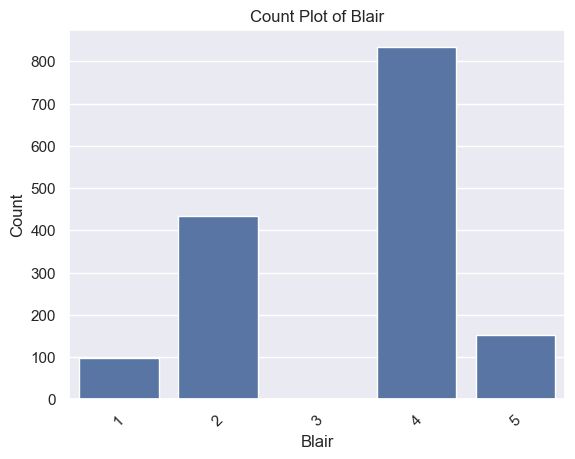

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the count plot
sns.countplot(data=Election, x='Blair')

# Add titles and labels
plt.title('Count Plot of Blair')
plt.xlabel('Blair')
plt.ylabel('Count')

# Show the plot
plt.xticks(rotation=45)  # Optional: Rotate x-axis labels if needed
plt.show()

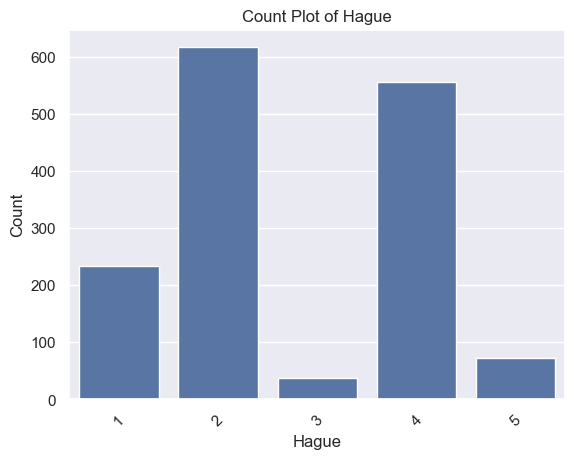

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the count plot
sns.countplot(data=Election, x='Hague')

# Add titles and labels
plt.title('Count Plot of Hague')
plt.xlabel('Hague')
plt.ylabel('Count')

# Show the plot
plt.xticks(rotation=45)  # Optional: Rotate x-axis labels if needed
plt.show()

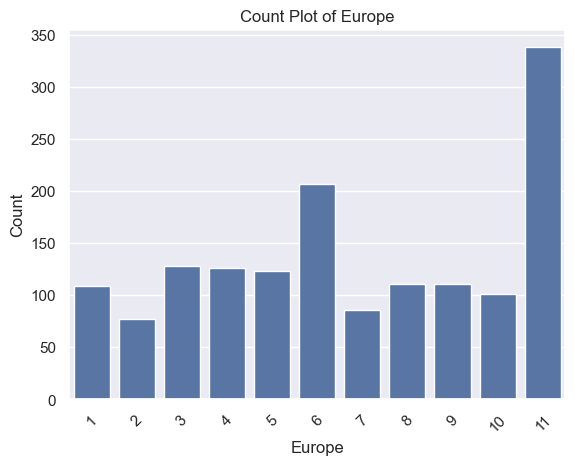

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the count plot
sns.countplot(data=Election, x='Europe')

# Add titles and labels
plt.title('Count Plot of Europe')
plt.xlabel('Europe')
plt.ylabel('Count')

# Show the plot
plt.xticks(rotation=45)  # Optional: Rotate x-axis labels if needed
plt.show()

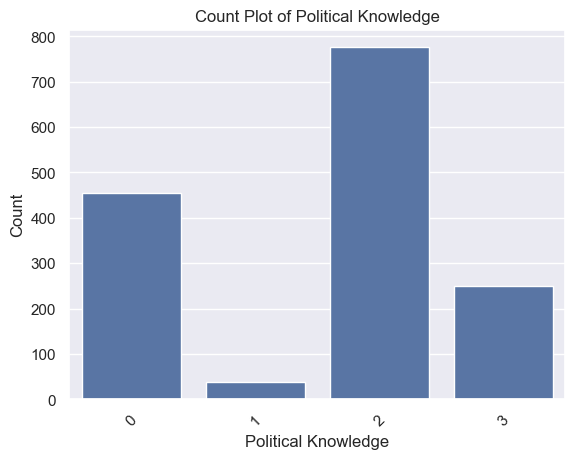

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the count plot
sns.countplot(data=Election, x='political.knowledge')

# Add titles and labels
plt.title('Count Plot of Political Knowledge')
plt.xlabel('Political Knowledge')
plt.ylabel('Count')

# Show the plot
plt.xticks(rotation=45)  # Optional: Rotate x-axis labels if needed
plt.show()

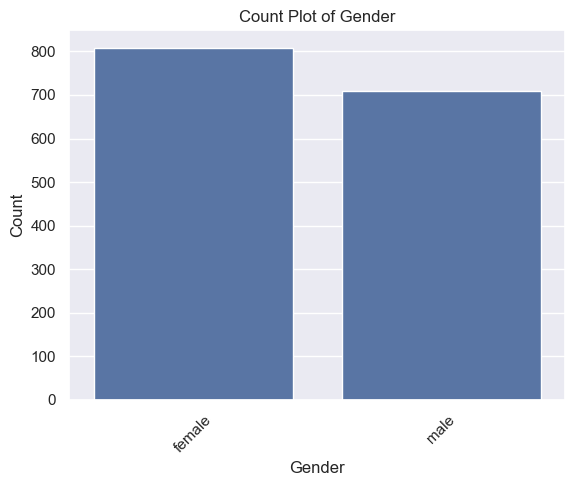

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the count plot
sns.countplot(data=Election, x='gender')

# Add titles and labels
plt.title('Count Plot of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# Show the plot
plt.xticks(rotation=45)  # Optional: Rotate x-axis labels if needed
plt.show()

Inference: There are large number of female voters than male voters according to gender.

Bivariate Analysis

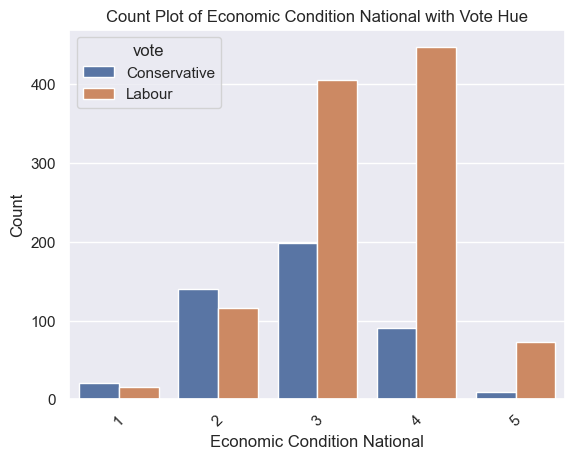

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the count plot with hue
sns.countplot(data=Election, x='economic.cond.national', hue='vote')

# Add titles and labels
plt.title('Count Plot of Economic Condition National with Vote Hue')
plt.xlabel('Economic Condition National')
plt.ylabel('Count')

# Show the plot
plt.xticks(rotation=45)  # Optional: Rotate x-axis labels if needed
plt.show()

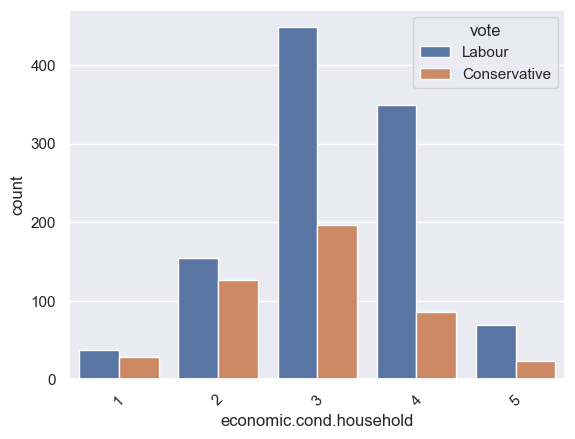

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is properly defined and contains the required columns

# Create the countplot
sns.countplot(data=Election, x='economic.cond.household', hue='vote')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Show the plot
plt.show()

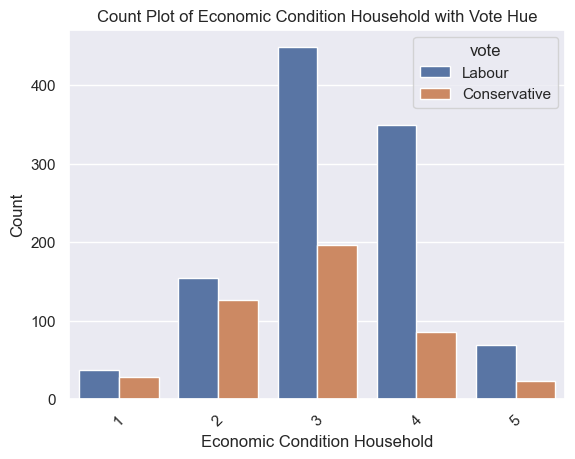

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the count plot with hue
sns.countplot(data=Election, x='economic.cond.household', hue='vote')

# Add titles and labels
plt.title('Count Plot of Economic Condition Household with Vote Hue')
plt.xlabel('Economic Condition Household')
plt.ylabel('Count')

# Show the plot
plt.xticks(rotation=45)  # Optional: Rotate x-axis labels if needed
plt.show()

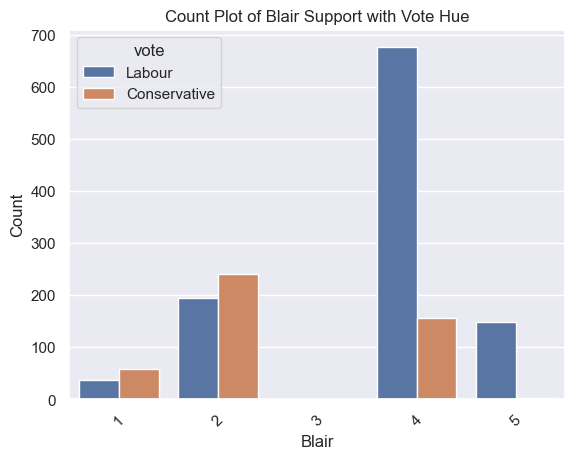

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the count plot with hue
sns.countplot(data=Election, x='Blair', hue='vote')

# Add titles and labels
plt.title('Count Plot of Blair Support with Vote Hue')
plt.xlabel('Blair')
plt.ylabel('Count')

# Show the plot
plt.xticks(rotation=45)  # Optional: Rotate x-axis labels if needed
plt.show()

In [3]:
import numpy as np
import pandas as pd

In [4]:
Election=pd.read_excel('D:/Ment Class/Practise11/Excel Data/Election.xlsx')

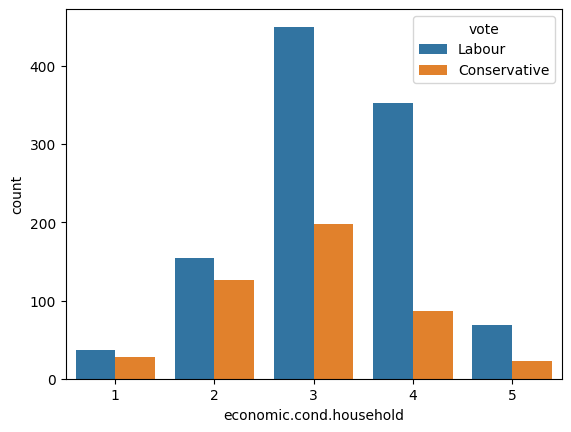

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'ElectionsData' is your DataFrame
sns.countplot(data=Election, x='economic.cond.household', hue='vote')

# Display the plot
plt.show()

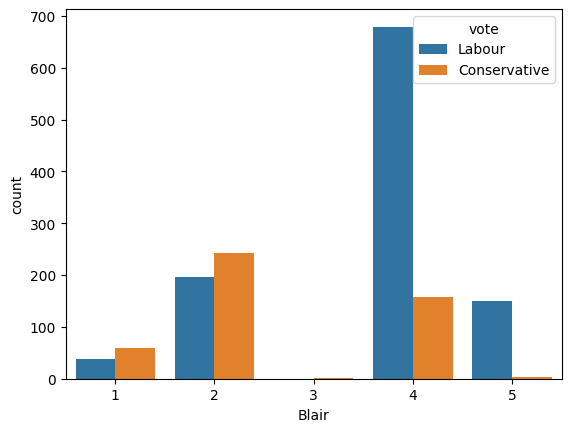

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the count plot
sns.countplot(data=Election, x='Blair', hue='vote')

# Show the plot
plt.show()

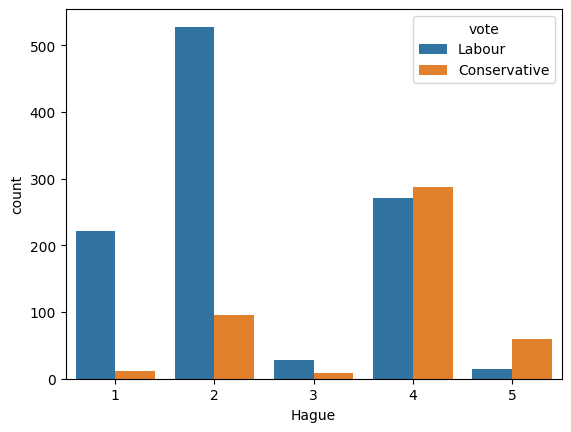

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the count plot
sns.countplot(data=Election, x='Hague', hue='vote')

# Show the plot
plt.show()

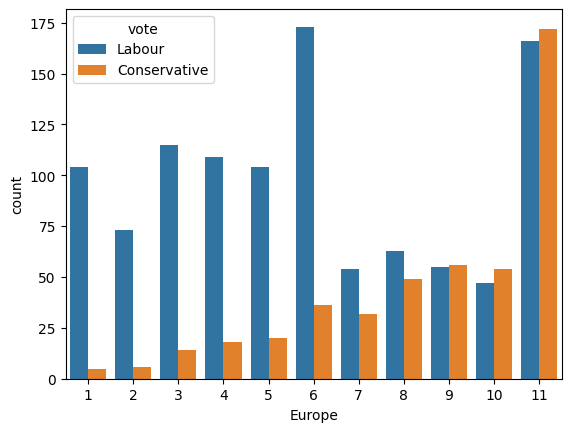

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the count plot
sns.countplot(data=Election, x='Europe', hue='vote')

# Display the plot
plt.show()

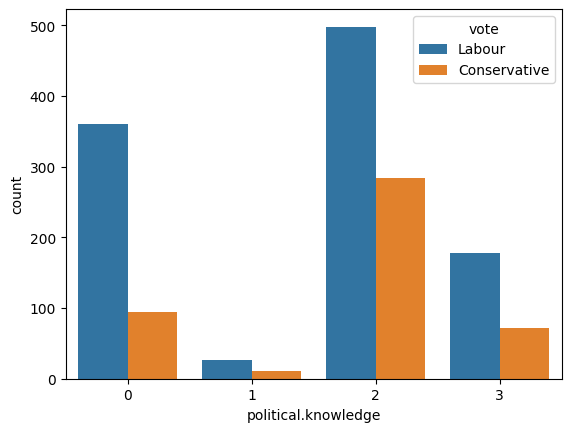

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the count plot
sns.countplot(data=Election, x='political.knowledge', hue='vote')

# Display the plot
plt.show()

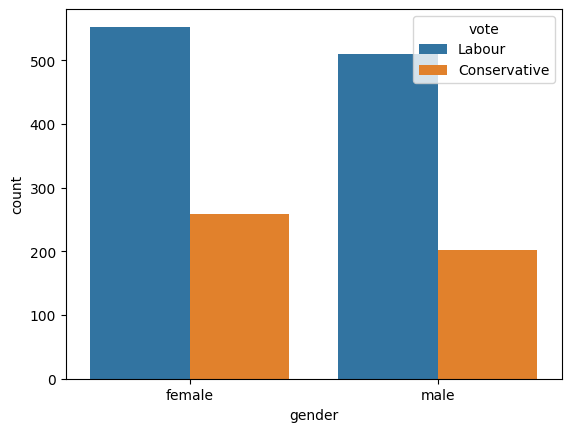

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the count plot
sns.countplot(data=Election, x='gender', hue='vote')

# Display the plot
plt.show()

Inference:

Labour gets the highest voting from both female and male voters. Almost in all the categories Labour is getting the maximum votes. Conservative gets a little bit high votes from Europe ‘11’.

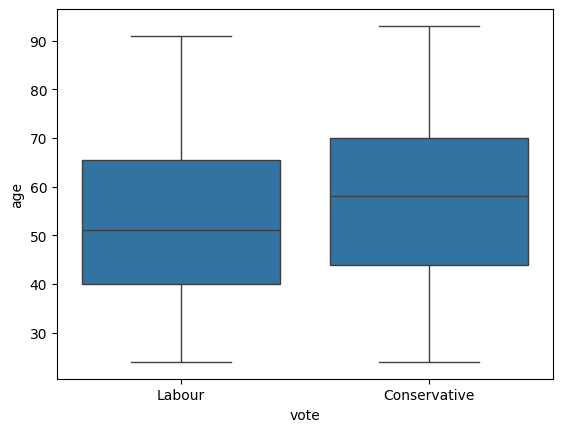

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the box plot
sns.boxplot(data=Election, x='vote', y='age')

# Display the plot
plt.show()

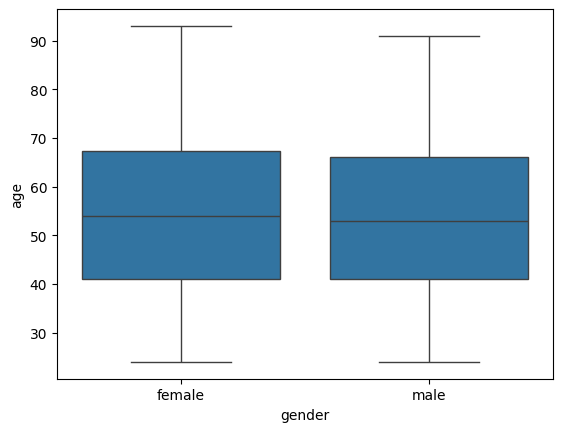

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the box plot
sns.boxplot(data=Election, x='gender', y='age')

# Display the plot
plt.show()

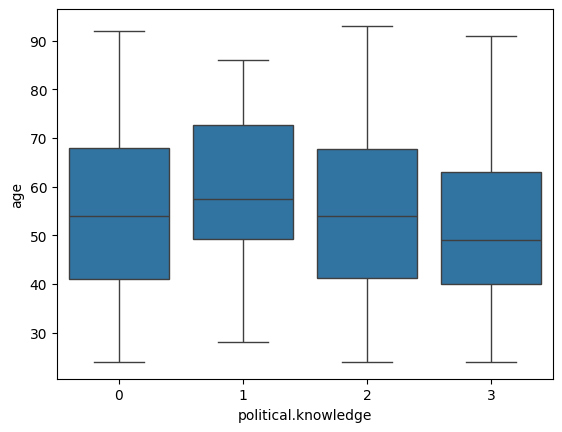

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the box plot
sns.boxplot(data=Election, x='political.knowledge', y='age')

# Display the plot
plt.show()

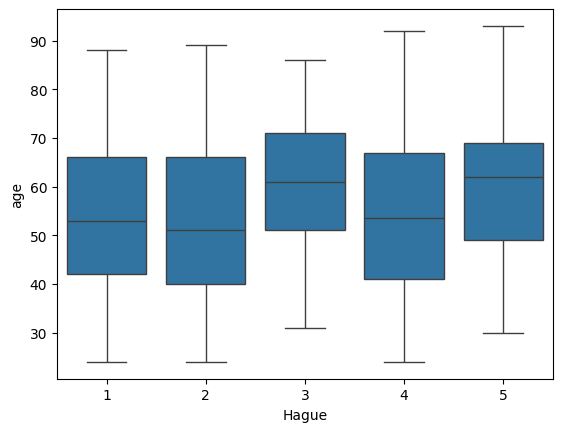

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the box plot
sns.boxplot(data=Election, x='Hague', y='age')

# Display the plot
plt.show()

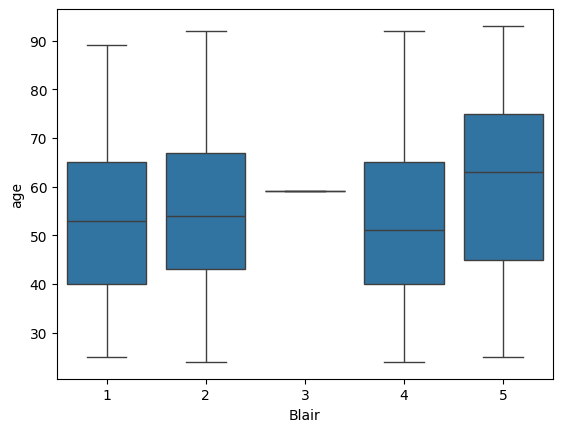

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the box plot
sns.boxplot(data=Election, x='Blair', y='age')

# Display the plot
plt.show()

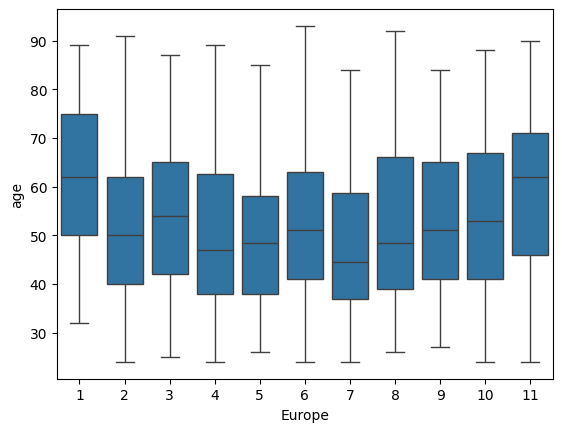

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the box plot
sns.boxplot(data=Election, x='Europe', y='age')

# Display the plot
plt.show()

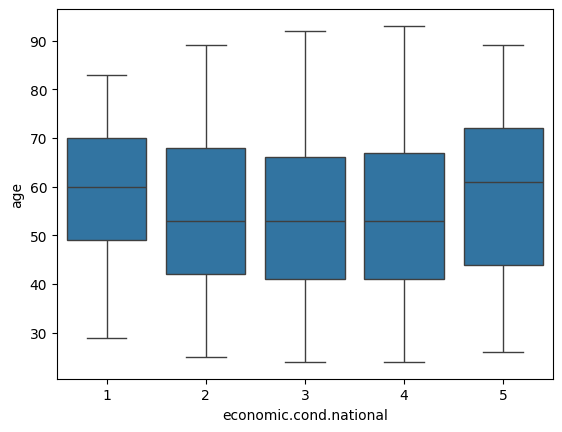

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the box plot
sns.boxplot(data=Election, x='economic.cond.national', y='age')

# Display the plot
plt.show()

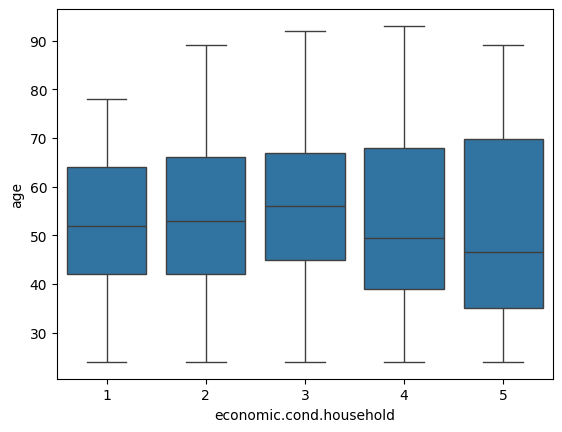

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the box plot
sns.boxplot(data=Election, x='economic.cond.household', y='age')

# Display the plot
plt.show()

Inference:

From the above all boxplots we could see people who vote Conservative are the people who are older. In variable Europe ‘1’ are older people.






In [20]:
import seaborn as sns


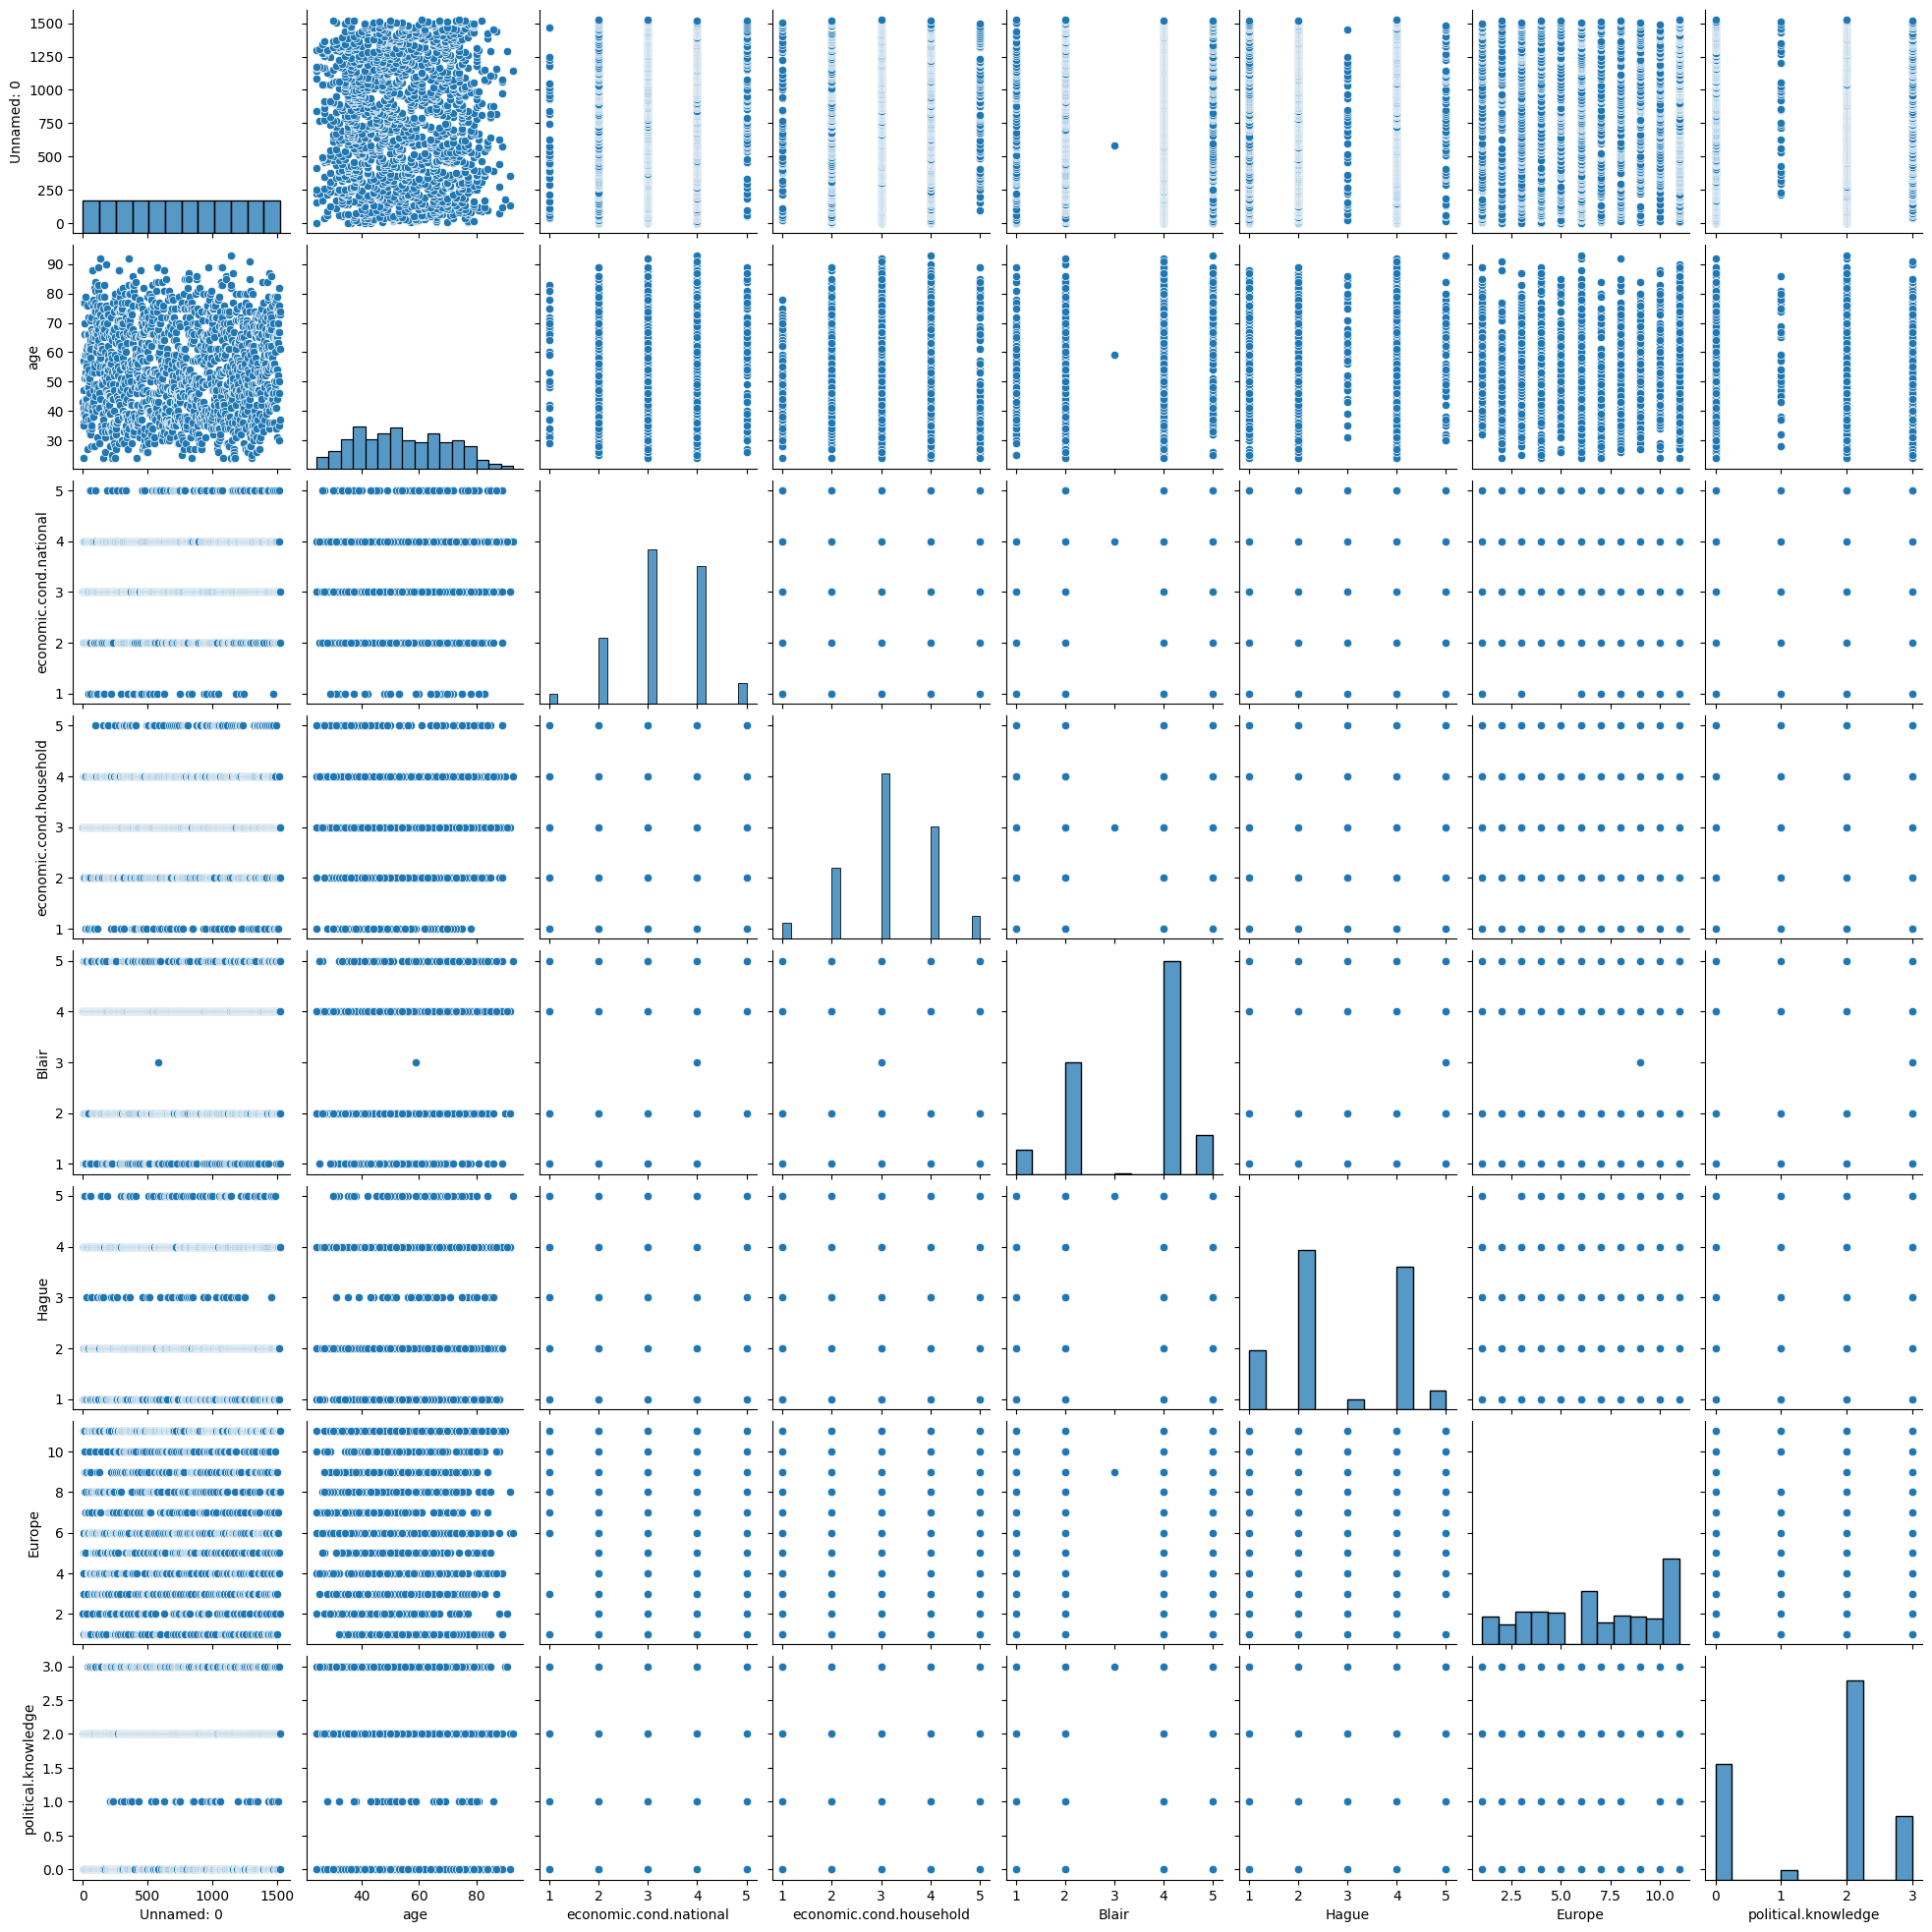

In [21]:
# Create the pairplot
sns.pairplot(data=Election)

# Show the plot
plt.show()

Exploratory Data Analysis

In [22]:
#Basic information

Election.info()

#Describe the data

Election.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


,Unnamed: 0,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
count,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000
mean,763.000000,54.182295,3.245902,3.140328,3.334426,2.746885,6.728525,1.542295
std,440.373894,15.711209,0.880969,0.929951,1.174824,1.230703,3.297538,1.083315
min,1.000000,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,382.000000,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000
50%,763.000000,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000
75%,1144.000000,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000
max,1525.000000,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000


In [23]:
#Find the duplicates

Election.duplicated().sum()

0

In [24]:
Election['gender'].unique()


array(['female', 'male'], dtype=object)

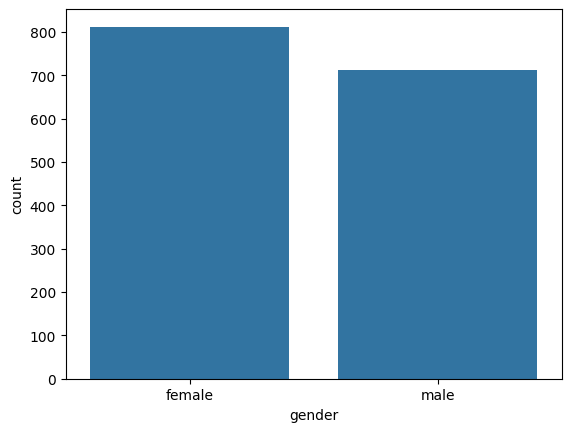

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the count plot
sns.countplot(data=Election, x='gender')

# Display the plot
plt.show()

In [26]:
#Find null values

Election.isnull().sum()

Unnamed: 0                 0
vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [27]:
Election.dtypes

Unnamed: 0                  int64
vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object

In [28]:
#Filter data

Election[Election['Hague']==1].head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male
7,8,Labour,77,3,4,4,1,1,0,male
9,10,Labour,70,3,2,5,1,11,2,male


In [29]:
import pandas as pd

# Drop non-numeric columns
numeric_data = Election.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = numeric_data.corr()

In [30]:
# Convert non-numeric columns to numeric types
Election_numeric = Election.apply(pd.to_numeric, errors='coerce')

# Now calculate quartiles and proceed with outlier detection
Q1 = Election_numeric.quantile(0.25)
Q3 = Election_numeric.quantile(0.75)
IQR = Q3 - Q1
outliers = Election_numeric[(Election_numeric < (Q1 - 1.5 * IQR)) | (Election_numeric > (Q3 + 1.5 * IQR))]
print(outliers)

      Unnamed: 0  vote  age  economic.cond.national  economic.cond.household  \
0            NaN   NaN  NaN                     NaN                      NaN   
1            NaN   NaN  NaN                     NaN                      NaN   
2            NaN   NaN  NaN                     NaN                      NaN   
3            NaN   NaN  NaN                     NaN                      NaN   
4            NaN   NaN  NaN                     NaN                      NaN   
...          ...   ...  ...                     ...                      ...   
1520         NaN   NaN  NaN                     NaN                      NaN   
1521         NaN   NaN  NaN                     NaN                      NaN   
1522         NaN   NaN  NaN                     NaN                      NaN   
1523         NaN   NaN  NaN                     NaN                      NaN   
1524         NaN   NaN  NaN                     NaN                      NaN   

      Blair  Hague  Europe  political.k

Inference:

Hague is the conservative leader.Most of the people fall under the category where they are highly Eurosceptic.Both the parties have good knowledge of Europe's political culture.We see that the data is not normally distributed.Majority of the participants are within 30 to 80 years of age.Age group of 45 to 50 years contribute to highest number of participants.Out of 1525 persons, 600 participants rated the economic condition of nation as morethan average level.Out of 1525 persons, around 650 participants rated the economic condition of householdas more than average level out of which 1200 rated it on a higher scale.Around 55% of participants rated Blair at above average level and 65% rated him athigher level of assessment.Around 40% above average rating. Only 50 participants granted highest ratings.15.Around 67% of people are aware of party's position on Europe's integration and 21% ofpeople are unaware of party's position on Europe's integration.Around 63% are skeptical of European integration and 27% are have ultimate skepticism. The variable age and vote are correlated to each other.Participants' Eurospectic sentiment has not influenced their assessment on economiccondition of nation or economic condition of household goods.When we draw the correlation heatmap, the below is what we get. This tells us that thereis no strong collinearity between the variables

Data Preparation 1.3 Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30). Encoding the dataset



In [31]:
import pandas as pd

In [32]:
Election=pd.read_excel('D:/Ment Class/Practise11/Excel Data/Election.xlsx')

In [33]:
Election.drop(columns='Unnamed: 0', inplace=True)
Election.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


Inference: The variables ‘vote’ and ‘gender’ have string values. Converting them into numeric values for modelling.

In [34]:
for feature in Election.columns:
    if Election[feature].dtype == 'object':
        print('\n')
        print('Required Feature:', feature)
        unique_values = Election[feature].unique()
        print(pd.Categorical(unique_values))
        codes = pd.Categorical(unique_values).codes
        print(codes)
        Election[feature] = pd.Categorical(Election[feature], categories=unique_values).codes



Required Feature: vote
['Labour', 'Conservative']
Categories (2, object): ['Conservative', 'Labour']
[1 0]


Required Feature: gender
['female', 'male']
Categories (2, object): ['female', 'male']
[0 1]


In [35]:
import pandas as pd

# Assuming ElectionsData is your DataFrame containing 'vote' and 'gender' columns
# Convert categorical variables to numerical
Election['vote'] = pd.Categorical(Election['vote']).codes
Election['gender'] = pd.Categorical(Election['gender']).codes

print(Election)

      vote  age  economic.cond.national  economic.cond.household  Blair  \
0        0   43                       3                        3      4   
1        0   36                       4                        4      4   
2        0   35                       4                        4      5   
3        0   24                       4                        2      2   
4        0   41                       2                        2      1   
...    ...  ...                     ...                      ...    ...   
1520     1   67                       5                        3      2   
1521     1   73                       2                        2      4   
1522     0   37                       3                        3      5   
1523     1   61                       3                        3      1   
1524     1   74                       2                        3      2   

      Hague  Europe  political.knowledge  gender  
0         1       2                    2       0

In [36]:
Election.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,0,43,3,3,4,1,2,2,0
1,0,36,4,4,4,4,5,2,1
2,0,35,4,4,5,2,3,2,1
3,0,24,4,2,2,1,4,0,0
4,0,41,2,2,1,1,6,2,1


In [37]:
Election['gender'].astype('float')


0       0.0
1       1.0
2       1.0
3       0.0
4       1.0
       ... 
1520    1.0
1521    1.0
1522    1.0
1523    1.0
1524    0.0
Name: gender, Length: 1525, dtype: float64

In [38]:
Election.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   vote                     1525 non-null   int8 
 1   age                      1525 non-null   int64
 2   economic.cond.national   1525 non-null   int64
 3   economic.cond.household  1525 non-null   int64
 4   Blair                    1525 non-null   int64
 5   Hague                    1525 non-null   int64
 6   Europe                   1525 non-null   int64
 7   political.knowledge      1525 non-null   int64
 8   gender                   1525 non-null   int8 
dtypes: int64(7), int8(2)
memory usage: 86.5 KB


Splitting the data into train and test

In [39]:
from sklearn.model_selection import train_test_split

# Predictor variables (X) should exclude the 'vote' column
X = Election.drop('vote', axis=1)

# Target variable (y) should include only the 'vote' column
y = Election['vote']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1220, 8)
X_test shape: (305, 8)
y_train shape: (1220,)
y_test shape: (305,)


In [40]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# Check the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1067, 8)
X_test shape: (458, 8)
y_train shape: (1067,)
y_test shape: (458,)


Modelling: 1.4 Apply Logistic Regression and LDA (linear discriminant analysis).

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [42]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data using the same scaler
X_test_scaled = scaler.transform(X_test)

In [43]:
# Create a logistic regression model
model1 = LogisticRegression()

In [44]:
# Fit the model to the training data
model1.fit(X_train, y_train)

C:\Users\vasan\anaconda3\python\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [45]:
# Make predictions on the training and test data
y_train_pred1 = model1.predict(X_train)
y_test_pred1 = model1.predict(X_test)

In [46]:
#train prediction
y_train_pred1

array([1, 0, 0, ..., 0, 0, 0], dtype=int8)

In [47]:
#test prediction
y_test_pred1

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,

In [48]:
# Generate a confusion matrix for the training and test data
confusion_matrix_train1 = confusion_matrix(y_train, y_train_pred1)
confusion_matrix_test1 = confusion_matrix(y_test, y_test_pred1)

In [49]:
# train confusion matrix
confusion_matrix_train1

array([[667,  68],
       [103, 229]], dtype=int64)

In [50]:
#test confusion matrix
confusion_matrix_test1

array([[292,  36],
       [ 45,  85]], dtype=int64)

In [51]:
# Compute the accuracy score for the training and test data
accuracy_train1 = accuracy_score(y_train, y_train_pred1)
accuracy_test1 = accuracy_score(y_test, y_test_pred1)

In [52]:
#train accuracy score
accuracy_train1

0.8397375820056232

In [53]:
#test accuracy score
accuracy_test1

0.8231441048034934

In [54]:
# Generate a classification report for the training and test data
classification_report_train1 = classification_report(y_train, y_train_pred1)
classification_report_test1 = classification_report(y_test, y_test_pred1)

In [55]:
#train classification report
classification_report_train1

'              precision    recall  f1-score   support\n\n           0       0.87      0.91      0.89       735\n           1       0.77      0.69      0.73       332\n\n    accuracy                           0.84      1067\n   macro avg       0.82      0.80      0.81      1067\nweighted avg       0.84      0.84      0.84      1067\n'

In [56]:
#test classification report
classification_report_test1

'              precision    recall  f1-score   support\n\n           0       0.87      0.89      0.88       328\n           1       0.70      0.65      0.68       130\n\n    accuracy                           0.82       458\n   macro avg       0.78      0.77      0.78       458\nweighted avg       0.82      0.82      0.82       458\n'

Inference:

The model is not overfitting or underfitting. Training and Testing results shows that the model is excellent with good precision and recall values. LDA (linear discriminant analysis).



In [57]:
#Applying LDA and fitting the training data
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
# Create an LDA model
model2 = LinearDiscriminantAnalysis()

In [58]:
# Fit the model to the training data
model2.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [59]:
# Make predictions on the training and test data
y_train_pred2 = model2.predict(X_train)
y_test_pred2 = model2.predict(X_test)

In [60]:
#prediction on train
y_train_pred2

array([1, 0, 0, ..., 0, 0, 0], dtype=int8)

In [61]:
#prediction on test
y_test_pred2

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,

In [62]:
# Generate a confusion matrix for the training and test data
confusion_matrix_train2 = confusion_matrix(y_train, y_train_pred2)
confusion_matrix_test2 = confusion_matrix(y_test, y_test_pred2)

In [63]:
#confusion matrix for train 
confusion_matrix_train2

array([[660,  75],
       [ 99, 233]], dtype=int64)

In [64]:
#confusion matrix for test 
confusion_matrix_test2

array([[289,  39],
       [ 44,  86]], dtype=int64)

In [65]:
# Compute the accuracy score for the training and test data
accuracy_train2 = accuracy_score(y_train, y_train_pred2)
accuracy_test2 = accuracy_score(y_test, y_test_pred2)

In [66]:
#accuracy score for train
accuracy_train2

0.8369259606373008

In [67]:
#accuracy score for test
accuracy_test2

0.8187772925764192

In [68]:
# Generate a classification report for the training and test data
classification_report_train2 = classification_report(y_train, y_train_pred2)
classification_report_test2 = classification_report(y_test, y_test_pred2)

In [69]:
#classification report for train
classification_report_train2

'              precision    recall  f1-score   support\n\n           0       0.87      0.90      0.88       735\n           1       0.76      0.70      0.73       332\n\n    accuracy                           0.84      1067\n   macro avg       0.81      0.80      0.81      1067\nweighted avg       0.83      0.84      0.84      1067\n'

In [70]:
#classification report for test
classification_report_test2

'              precision    recall  f1-score   support\n\n           0       0.87      0.88      0.87       328\n           1       0.69      0.66      0.67       130\n\n    accuracy                           0.82       458\n   macro avg       0.78      0.77      0.77       458\nweighted avg       0.82      0.82      0.82       458\n'

Inference:

Training and Testing results shows that the model is excellent with good precision and recall values. 2. The LDA model is better than Logistic regression with better Test accuracy and recall values.

1.5 Apply KNN Model and Naïve Bayes Model. Interpret the results KNN

In [71]:
from sklearn.neighbors import KNeighborsClassifier
# Create a KNN model
model3 = KNeighborsClassifier()

In [72]:
# Fit the model to the training data
model3.fit(X_train, y_train)

KNeighborsClassifier()

In [73]:
# Make predictions on the training and test data
y_train_pred3 = model3.predict(X_train)
y_test_pred3 = model3.predict(X_test)

In [74]:
#prediction on train
y_train_pred3

array([0, 1, 0, ..., 0, 0, 0], dtype=int8)

In [75]:
#prediction on test
y_test_pred3

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,

In [76]:
# Generate a confusion matrix for the training and test data
confusion_matrix_train3 = confusion_matrix(y_train, y_train_pred3)
confusion_matrix_test3 = confusion_matrix(y_test, y_test_pred3)

In [77]:
#confusion matrix for train 
confusion_matrix_train3

array([[673,  62],
       [ 86, 246]], dtype=int64)

In [78]:
#confusion matrix for test 
confusion_matrix_test3

array([[279,  49],
       [ 49,  81]], dtype=int64)

In [79]:
# Compute the accuracy score for the training and test data
accuracy_train3 = accuracy_score(y_train, y_train_pred3)
accuracy_test3 = accuracy_score(y_test, y_test_pred3)

In [80]:
#accuracy score for train
accuracy_train3

0.8612933458294283

In [81]:
#accuracy score for test
accuracy_test3

0.7860262008733624

In [82]:
# Generate a classification report for the training and test data
classification_report_train3 = classification_report(y_train, y_train_pred3)
classification_report_test3 = classification_report(y_test, y_test_pred3)

In [83]:
#classification report for train
classification_report_train3

'              precision    recall  f1-score   support\n\n           0       0.89      0.92      0.90       735\n           1       0.80      0.74      0.77       332\n\n    accuracy                           0.86      1067\n   macro avg       0.84      0.83      0.83      1067\nweighted avg       0.86      0.86      0.86      1067\n'

In [84]:
#classification report for test
classification_report_test3

'              precision    recall  f1-score   support\n\n           0       0.85      0.85      0.85       328\n           1       0.62      0.62      0.62       130\n\n    accuracy                           0.79       458\n   macro avg       0.74      0.74      0.74       458\nweighted avg       0.79      0.79      0.79       458\n'

Naive Bayes

In [85]:
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Naive Bayes classifier
model4 = GaussianNB()

# Fit the classifier to the training data
model4.fit(X_train, y_train)

GaussianNB()

In [86]:
# Make predictions on the training and test data
y_train_pred4 = model4.predict(X_train)
y_test_pred4 = model4.predict(X_test)

In [87]:
#prediction on train
y_train_pred4

array([1, 0, 0, ..., 0, 0, 0], dtype=int8)

In [88]:
#prediction on test
y_test_pred4

array([1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,

In [89]:
# Generate a confusion matrix for the training and test data
confusion_matrix_train4 = confusion_matrix(y_train, y_train_pred4)
confusion_matrix_test4 = confusion_matrix(y_test, y_test_pred4)

In [90]:
#confusion matrix for train 
confusion_matrix_train4

array([[649,  86],
       [ 92, 240]], dtype=int64)

In [91]:
#confusion matrix for test 
confusion_matrix_test4

array([[284,  44],
       [ 36,  94]], dtype=int64)

In [92]:
# Compute the accuracy score for the training and test data
accuracy_train4 = accuracy_score(y_train, y_train_pred4)
accuracy_test4 = accuracy_score(y_test, y_test_pred4)

In [93]:
#accuracy score for train
accuracy_train4

0.8331771321462043

In [94]:
#accuracy score for test
accuracy_test4

0.8253275109170306

In [95]:
# Generate a classification report for the training and test data
classification_report_train4 = classification_report(y_train, y_train_pred4)
classification_report_test4 = classification_report(y_test, y_test_pred4)

In [96]:
#classification report for train
classification_report_train4

'              precision    recall  f1-score   support\n\n           0       0.88      0.88      0.88       735\n           1       0.74      0.72      0.73       332\n\n    accuracy                           0.83      1067\n   macro avg       0.81      0.80      0.80      1067\nweighted avg       0.83      0.83      0.83      1067\n'

In [97]:
#classification report for test
classification_report_test4

'              precision    recall  f1-score   support\n\n           0       0.89      0.87      0.88       328\n           1       0.68      0.72      0.70       130\n\n    accuracy                           0.83       458\n   macro avg       0.78      0.79      0.79       458\nweighted avg       0.83      0.83      0.83       458\n'

Inference:

Training and Testing results shows that the model neither overfitting nor underfitting. The Naive Bayes model also performs well with better accuracy and recall values. Even though NB and KNN have same Train and Test accuracy. Based on their recall value in test dataset it is evident that KNN performs better than Naive Bayes.

In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [99]:
# Train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Tune the model using grid search
param_grid = {'n_estimators': [10, 50, 100], 'max_depth': [None, 5, 10]}
model5 = GridSearchCV(model, param_grid, cv=5)
model5.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'n_estimators': [10, 50, 100]})

In [100]:
# Make predictions on the training and test data
y_train_pred5 = model5.predict(X_train)
y_test_pred5 = model5.predict(X_test)

In [101]:
#prediction on train
y_train_pred5

array([0, 1, 0, ..., 0, 0, 0], dtype=int8)

In [102]:
#prediction on test
y_test_pred5

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,

In [103]:
# Compute the accuracy score for the training and test data
accuracy_train5 = accuracy_score(y_train, y_train_pred5)
accuracy_test5 = accuracy_score(y_test, y_test_pred5)

In [104]:
accuracy_train5


0.9615745079662605

In [105]:
accuracy_test5

0.8165938864628821

In [106]:
# Generate a confusion matrix for the training and test data
confusion_matrix_train5 = confusion_matrix(y_train, y_train_pred5)
confusion_matrix_test5 = confusion_matrix(y_test, y_test_pred5)

In [107]:
#train confusion matrix
confusion_matrix_train5

array([[721,  14],
       [ 27, 305]], dtype=int64)

In [108]:
#test confusion matrix
confusion_matrix_test5

array([[286,  42],
       [ 42,  88]], dtype=int64)

In [109]:
# Generate a classification report for the training and test data
classification_report_train5 = classification_report(y_train, y_train_pred5)
classification_report_test5 = classification_report(y_test, y_test_pred5)

In [110]:
#train classification report
classification_report_train5

'              precision    recall  f1-score   support\n\n           0       0.96      0.98      0.97       735\n           1       0.96      0.92      0.94       332\n\n    accuracy                           0.96      1067\n   macro avg       0.96      0.95      0.95      1067\nweighted avg       0.96      0.96      0.96      1067\n'

In [111]:
#test classification report
classification_report_test5

'              precision    recall  f1-score   support\n\n           0       0.87      0.87      0.87       328\n           1       0.68      0.68      0.68       130\n\n    accuracy                           0.82       458\n   macro avg       0.77      0.77      0.77       458\nweighted avg       0.82      0.82      0.82       458\n'

Bagging

In [112]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

# Initialize the BaggingClassifier without specifying the base_estimator
model6 = BaggingClassifier(n_estimators=10, random_state=0)

# Set the base estimator separately
model6.base_estimator = RandomForestClassifier(n_estimators=10, random_state=0)

# Fit the bagging classifier to the training data
model6.fit(X_train, y_train)

BaggingClassifier(random_state=0)

In [113]:
# Make predictions on the training and test data
y_train_pred6 = model6.predict(X_train)
y_test_pred6 = model6.predict(X_test)

In [114]:
#train prediction
y_train_pred6

array([0, 1, 0, ..., 0, 0, 0], dtype=int8)

In [115]:
# Generate a confusion matrix for the training and test data
confusion_matrix_train6 = confusion_matrix(y_train, y_train_pred6)
confusion_matrix_test6 = confusion_matrix(y_test, y_test_pred6)

In [116]:
#train confusion matrix
confusion_matrix_train6

array([[731,   4],
       [ 15, 317]], dtype=int64)

In [117]:
#test confusion matrix
confusion_matrix_test6

array([[285,  43],
       [ 48,  82]], dtype=int64)

In [118]:
# Compute the accuracy score for the training and test data
accuracy_train6 = accuracy_score(y_train, y_train_pred6)
accuracy_test6 = accuracy_score(y_test, y_test_pred6)

In [119]:
#train accuracy score
accuracy_train6

0.9821930646672915

In [120]:
#test accuracy score
accuracy_test6

0.8013100436681223

In [121]:
# Generate a classification report for the training and test data
classification_report_train6 = classification_report(y_train, y_train_pred6)
classification_report_test6 = classification_report(y_test, y_test_pred6)

In [122]:
#train classification report
classification_report_train6

'              precision    recall  f1-score   support\n\n           0       0.98      0.99      0.99       735\n           1       0.99      0.95      0.97       332\n\n    accuracy                           0.98      1067\n   macro avg       0.98      0.97      0.98      1067\nweighted avg       0.98      0.98      0.98      1067\n'

In [123]:
#test classification report
classification_report_test6

'              precision    recall  f1-score   support\n\n           0       0.86      0.87      0.86       328\n           1       0.66      0.63      0.64       130\n\n    accuracy                           0.80       458\n   macro avg       0.76      0.75      0.75       458\nweighted avg       0.80      0.80      0.80       458\n'

Boosting

In [124]:
# Import necessary libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [125]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize the BaggingClassifier without specifying the base_estimator
model7= BaggingClassifier(n_estimators=10, random_state=0)

# Set the base estimator separately
model7.base_estimator = RandomForestClassifier(n_estimators=10, random_state=0)

# Fit the bagging classifier to the training data
model7.fit(X_train, y_train)

BaggingClassifier(random_state=0)

In [126]:
# Make predictions on the training and test data
y_train_pred7 = model7.predict(X_train)
y_test_pred7 = model7.predict(X_test)

In [127]:
#train prediction
y_train_pred7

array([0, 1, 0, ..., 0, 0, 0], dtype=int8)

In [128]:
#train prediction
y_train_pred7

array([0, 1, 0, ..., 0, 0, 0], dtype=int8)

In [129]:
# Generate a confusion matrix for the training and test data
confusion_matrix_train7 = confusion_matrix(y_train, y_train_pred7)
confusion_matrix_test7 = confusion_matrix(y_test, y_test_pred7)

In [130]:
#train confusion matrix
confusion_matrix_train7

array([[731,   4],
       [ 15, 317]], dtype=int64)

In [131]:
#test confusion matrix
confusion_matrix_test7

array([[285,  43],
       [ 48,  82]], dtype=int64)

In [132]:
# Compute the accuracy score for the training and test data
accuracy_train7 = accuracy_score(y_train, y_train_pred7)
accuracy_test7 = accuracy_score(y_test, y_test_pred7)

In [133]:
#train accuracy score
accuracy_train7

0.9821930646672915

In [134]:
#test accuracy score
accuracy_test7

0.8013100436681223

In [135]:
# Generate a classification report for the training and test data
classification_report_train7 = classification_report(y_train, y_train_pred7)
classification_report_test7 = classification_report(y_test, y_test_pred7)

In [136]:
#train classification report
classification_report_train7

'              precision    recall  f1-score   support\n\n           0       0.98      0.99      0.99       735\n           1       0.99      0.95      0.97       332\n\n    accuracy                           0.98      1067\n   macro avg       0.98      0.97      0.98      1067\nweighted avg       0.98      0.98      0.98      1067\n'

In [137]:
#test classification report
classification_report_test7

'              precision    recall  f1-score   support\n\n           0       0.86      0.87      0.86       328\n           1       0.66      0.63      0.64       130\n\n    accuracy                           0.80       458\n   macro avg       0.76      0.75      0.75       458\nweighted avg       0.80      0.80      0.80       458\n'

In [138]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification

# Generating some example data
X, y = make_classification(n_samples=1000, n_features=20)

# Creating an AdaBoostClassifier instance
ada_boost = AdaBoostClassifier()

# Define the grid of hyperparameters to search through
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1.0],
    'algorithm': ['SAMME', 'SAMME.R']
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(ada_boost, param_grid, cv=5, scoring='accuracy')

# Perform the grid search
grid_search.fit(X, y)

# Best parameters found
print("Best parameters:", grid_search.best_params_)

# Best cross-validation score found
print("Best cross-validation score:", grid_search.best_score_)

C:\Users\vasan\anaconda3\python\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\vasan\anaconda3\python\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\vasan\anaconda3\python\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\vasan\anaconda3\python\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
 

Best parameters: {'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 150}
Best cross-validation score: 0.9


In [139]:
grid_search.best_score_

0.9

In [140]:
grid_search.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 150}

Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model: Compare the models and write inference which model is best/optimized.

Logistic Regression

In [141]:
print("Train set of Logistic Regression:")
print("Accuary Score: ",accuracy_train1)
print("Confusion Matrix: ",confusion_matrix_train1)
print("Classification Report",classification_report_train1)
print("Test set of Logistic Regression")
print("Accuary Score: ",accuracy_test1)
print("Confusion Matrix",confusion_matrix_test1)
print("Classification Report",classification_report_test1)

Train set of Logistic Regression:
Accuary Score:  0.8397375820056232
Confusion Matrix:  [[667  68]
 [103 229]]
Classification Report               precision    recall  f1-score   support

           0       0.87      0.91      0.89       735
           1       0.77      0.69      0.73       332

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067

Test set of Logistic Regression
Accuary Score:  0.8231441048034934
Confusion Matrix [[292  36]
 [ 45  85]]
Classification Report               precision    recall  f1-score   support

           0       0.87      0.89      0.88       328
           1       0.70      0.65      0.68       130

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.78       458
weighted avg       0.82      0.82      0.82       458



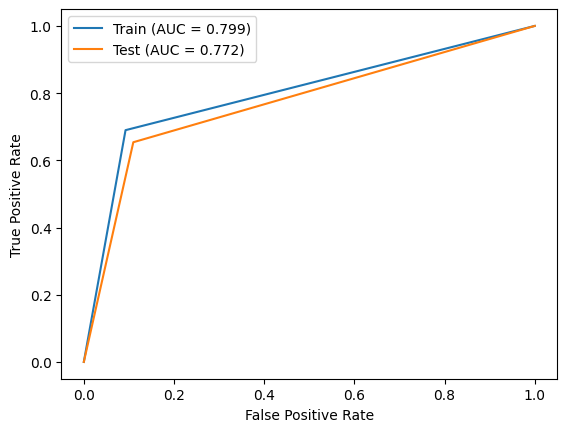

In [142]:
from sklearn.metrics import roc_auc_score, roc_curve
from matplotlib import pyplot as plt
# Compute the AUC score for the train set
auc_train = roc_auc_score(y_train, y_train_pred1)
# Compute the AUC score for the test set
auc_test = roc_auc_score(y_test, y_test_pred1)

# Compute the false positive rate and true positive rate for the train set
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred1)

# Compute the false positive rate and true positive rate for the test set
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_pred1)

# Plot the ROC curve for the train set
plt.plot(fpr_train, tpr_train, label="Train (AUC = {:.3f})".format(auc_train))

# Plot the ROC curve for the test set
plt.plot(fpr_test, tpr_test, label="Test (AUC = {:.3f})".format(auc_test))

# Add labels and a legend to the plot
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

# Show the plot
plt.show()

LDA-Linear Discriminant Analysis

In [143]:
print("Train set of LDA:")
print("Accuary Score: ",accuracy_train2)
print("Confusion Matrix: ",confusion_matrix_train2)
print("Classification Report",classification_report_train2)
print("Test set of LDA:")
print("Accuary Score: ",accuracy_test2)
print("Confusion Matrix",confusion_matrix_test2)
print("Classification Report",classification_report_test2)

Train set of LDA:
Accuary Score:  0.8369259606373008
Confusion Matrix:  [[660  75]
 [ 99 233]]
Classification Report               precision    recall  f1-score   support

           0       0.87      0.90      0.88       735
           1       0.76      0.70      0.73       332

    accuracy                           0.84      1067
   macro avg       0.81      0.80      0.81      1067
weighted avg       0.83      0.84      0.84      1067

Test set of LDA:
Accuary Score:  0.8187772925764192
Confusion Matrix [[289  39]
 [ 44  86]]
Classification Report               precision    recall  f1-score   support

           0       0.87      0.88      0.87       328
           1       0.69      0.66      0.67       130

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.82      0.82      0.82       458



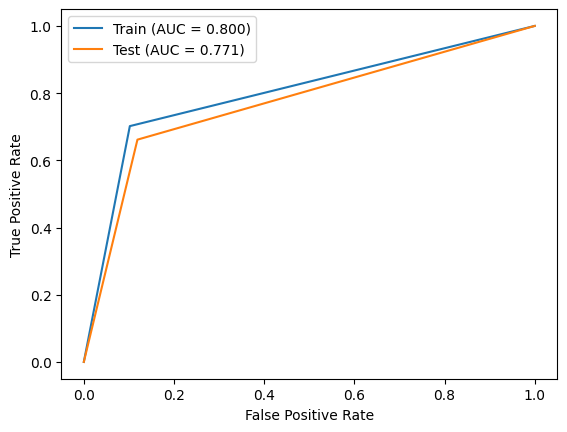

In [144]:
from sklearn.metrics import roc_auc_score, roc_curve
from matplotlib import pyplot as plt
# Compute the AUC score for the train set
auc_train = roc_auc_score(y_train, y_train_pred2)
# Compute the AUC score for the test set
auc_test = roc_auc_score(y_test, y_test_pred2)

# Compute the false positive rate and true positive rate for the train set
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred2)

# Compute the false positive rate and true positive rate for the test set
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_pred2)

# Plot the ROC curve for the train set
plt.plot(fpr_train, tpr_train, label="Train (AUC = {:.3f})".format(auc_train))

# Plot the ROC curve for the test set
plt.plot(fpr_test, tpr_test, label="Test (AUC = {:.3f})".format(auc_test))

# Add labels and a legend to the plot
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

KNN

In [145]:
print("Train set of KNN:")
print("Accuary Score: ",accuracy_train3)
print("Confusion Matrix: ",confusion_matrix_train3)
print("Classification Report",classification_report_train3)
print("Test set of KNN:")
print("Accuary Score: ",accuracy_test3)
print("Confusion Matrix",confusion_matrix_test3)
print("Classification Report",classification_report_test3)

Train set of KNN:
Accuary Score:  0.8612933458294283
Confusion Matrix:  [[673  62]
 [ 86 246]]
Classification Report               precision    recall  f1-score   support

           0       0.89      0.92      0.90       735
           1       0.80      0.74      0.77       332

    accuracy                           0.86      1067
   macro avg       0.84      0.83      0.83      1067
weighted avg       0.86      0.86      0.86      1067

Test set of KNN:
Accuary Score:  0.7860262008733624
Confusion Matrix [[279  49]
 [ 49  81]]
Classification Report               precision    recall  f1-score   support

           0       0.85      0.85      0.85       328
           1       0.62      0.62      0.62       130

    accuracy                           0.79       458
   macro avg       0.74      0.74      0.74       458
weighted avg       0.79      0.79      0.79       458



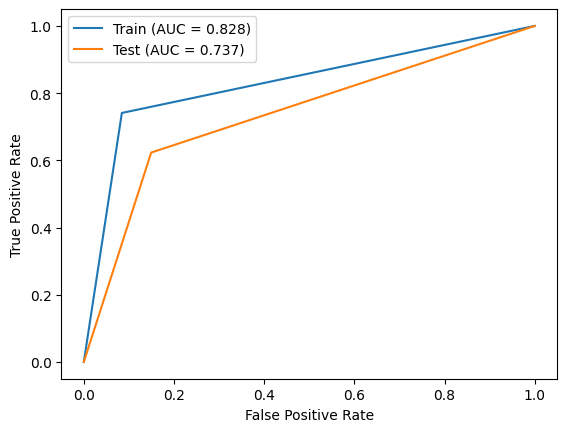

In [146]:
from sklearn.metrics import roc_auc_score, roc_curve
from matplotlib import pyplot as plt
# Compute the AUC score for the train set
auc_train = roc_auc_score(y_train, y_train_pred3)
# Compute the AUC score for the test set
auc_test = roc_auc_score(y_test, y_test_pred3)

# Compute the false positive rate and true positive rate for the train set
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred3)

# Compute the false positive rate and true positive rate for the test set
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_pred3)

# Plot the ROC curve for the train set
plt.plot(fpr_train, tpr_train, label="Train (AUC = {:.3f})".format(auc_train))

# Plot the ROC curve for the test set
plt.plot(fpr_test, tpr_test, label="Test (AUC = {:.3f})".format(auc_test))

# Add labels and a legend to the plot
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

# Show the plot
plt.show()

Naive Bayes

In [147]:
print("Train set of Naive Bayes:")
print("Accuary Score: ",accuracy_train4)
print("Confusion Matrix: ",confusion_matrix_train4)
print("Classification Report",classification_report_train4)
print("Test set of Naive Bayes:")
print("Accuary Score: ",accuracy_test4)
print("Confusion Matrix",confusion_matrix_test4)
print("Classification Report",classification_report_test4)

Train set of Naive Bayes:
Accuary Score:  0.8331771321462043
Confusion Matrix:  [[649  86]
 [ 92 240]]
Classification Report               precision    recall  f1-score   support

           0       0.88      0.88      0.88       735
           1       0.74      0.72      0.73       332

    accuracy                           0.83      1067
   macro avg       0.81      0.80      0.80      1067
weighted avg       0.83      0.83      0.83      1067

Test set of Naive Bayes:
Accuary Score:  0.8253275109170306
Confusion Matrix [[284  44]
 [ 36  94]]
Classification Report               precision    recall  f1-score   support

           0       0.89      0.87      0.88       328
           1       0.68      0.72      0.70       130

    accuracy                           0.83       458
   macro avg       0.78      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458



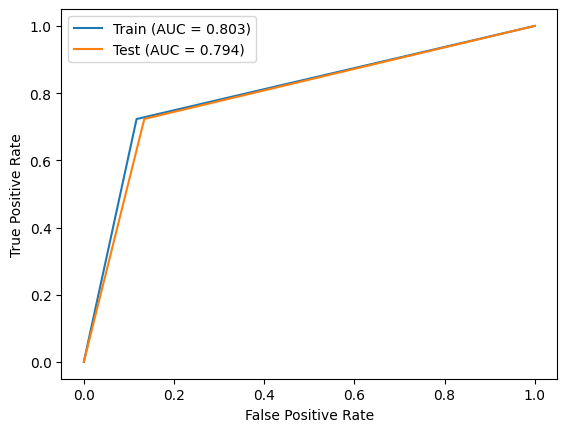

In [148]:
from sklearn.metrics import roc_auc_score, roc_curve
from matplotlib import pyplot as plt
# Compute the AUC score for the train set
auc_train = roc_auc_score(y_train, y_train_pred4)
# Compute the AUC score for the test set
auc_test = roc_auc_score(y_test, y_test_pred4)

# Compute the false positive rate and true positive rate for the train set
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred4)

# Compute the false positive rate and true positive rate for the test set
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_pred4)

# Plot the ROC curve for the train set
plt.plot(fpr_train, tpr_train, label="Train (AUC = {:.3f})".format(auc_train))

# Plot the ROC curve for the test set
plt.plot(fpr_test, tpr_test, label="Test (AUC = {:.3f})".format(auc_test))

# Add labels and a legend to the plot
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

# Show the plot
plt.show()

Model Tuning

In [149]:
print("Train set of Model Tuning:")
print("Accuary Score: ",accuracy_train5)
print("Confusion Matrix: ",confusion_matrix_train5)
print("Classification Report",classification_report_train5)
print("Test set of Model Tuning:")
print("Accuary Score: ",accuracy_test5)
print("Confusion Matrix",confusion_matrix_test5)
print("Classification Report",classification_report_test5)

Train set of Model Tuning:
Accuary Score:  0.9615745079662605
Confusion Matrix:  [[721  14]
 [ 27 305]]
Classification Report               precision    recall  f1-score   support

           0       0.96      0.98      0.97       735
           1       0.96      0.92      0.94       332

    accuracy                           0.96      1067
   macro avg       0.96      0.95      0.95      1067
weighted avg       0.96      0.96      0.96      1067

Test set of Model Tuning:
Accuary Score:  0.8165938864628821
Confusion Matrix [[286  42]
 [ 42  88]]
Classification Report               precision    recall  f1-score   support

           0       0.87      0.87      0.87       328
           1       0.68      0.68      0.68       130

    accuracy                           0.82       458
   macro avg       0.77      0.77      0.77       458
weighted avg       0.82      0.82      0.82       458



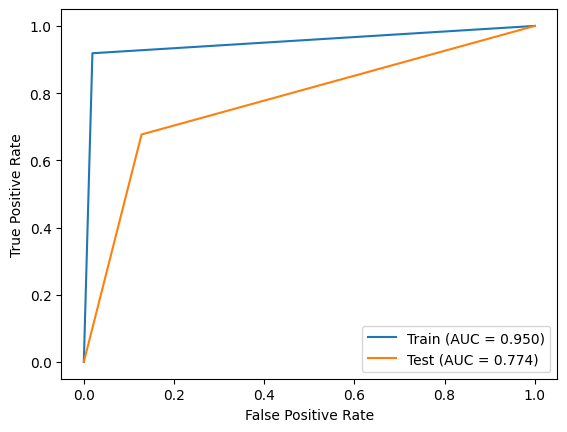

In [150]:
from sklearn.metrics import roc_auc_score, roc_curve
from matplotlib import pyplot as plt
# Compute the AUC score for the train set
auc_train = roc_auc_score(y_train, y_train_pred5)
# Compute the AUC score for the test set
auc_test = roc_auc_score(y_test, y_test_pred5)

# Compute the false positive rate and true positive rate for the train set
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred5)

# Compute the false positive rate and true positive rate for the test set
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_pred5)

# Plot the ROC curve for the train set
plt.plot(fpr_train, tpr_train, label="Train (AUC = {:.3f})".format(auc_train))

# Plot the ROC curve for the test set
plt.plot(fpr_test, tpr_test, label="Test (AUC = {:.3f})".format(auc_test))

# Add labels and a legend to the plot
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

# Show the plot
plt.show()

Bagging

In [151]:
print("Train set of Bagging:")
print("Accuary Score: ",accuracy_train6)
print("Confusion Matrix: ",confusion_matrix_train6)
print("Classification Report",classification_report_train6)
print("Test set of Bagging:")
print("Accuary Score: ",accuracy_test6)
print("Confusion Matrix",confusion_matrix_test6)
print("Classification Report",classification_report_test6)

Train set of Bagging:
Accuary Score:  0.9821930646672915
Confusion Matrix:  [[731   4]
 [ 15 317]]
Classification Report               precision    recall  f1-score   support

           0       0.98      0.99      0.99       735
           1       0.99      0.95      0.97       332

    accuracy                           0.98      1067
   macro avg       0.98      0.97      0.98      1067
weighted avg       0.98      0.98      0.98      1067

Test set of Bagging:
Accuary Score:  0.8013100436681223
Confusion Matrix [[285  43]
 [ 48  82]]
Classification Report               precision    recall  f1-score   support

           0       0.86      0.87      0.86       328
           1       0.66      0.63      0.64       130

    accuracy                           0.80       458
   macro avg       0.76      0.75      0.75       458
weighted avg       0.80      0.80      0.80       458



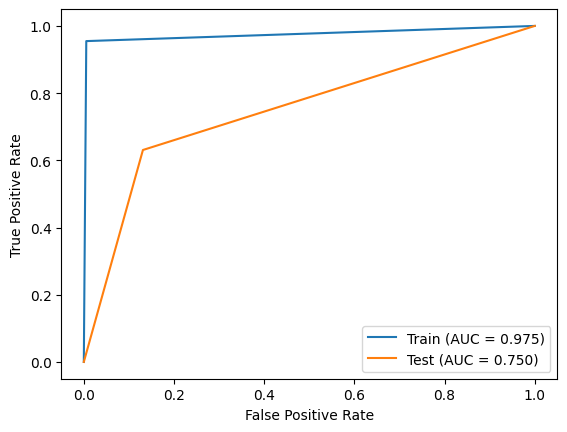

In [152]:
from sklearn.metrics import roc_auc_score, roc_curve
from matplotlib import pyplot as plt
# Compute the AUC score for the train set
auc_train = roc_auc_score(y_train, y_train_pred6)
# Compute the AUC score for the test set
auc_test = roc_auc_score(y_test, y_test_pred6)

# Compute the false positive rate and true positive rate for the train set
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred6)

# Compute the false positive rate and true positive rate for the test set
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_pred6)

# Plot the ROC curve for the train set
plt.plot(fpr_train, tpr_train, label="Train (AUC = {:.3f})".format(auc_train))

# Plot the ROC curve for the test set
plt.plot(fpr_test, tpr_test, label="Test (AUC = {:.3f})".format(auc_test))

# Add labels and a legend to the plot
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

# Show the plot
plt.show()

Boosting

In [153]:
print("Train set of Boosting:")
print("Accuary Score: ",accuracy_train7)
print("Confusion Matrix: ",confusion_matrix_train7)
print("Classification Report",classification_report_train7)
print("Test set of Boosting:")
print("Accuary Score: ",accuracy_test7)
print("Confusion Matrix",confusion_matrix_test7)
print("Classification Report",classification_report_test7)

Train set of Boosting:
Accuary Score:  0.9821930646672915
Confusion Matrix:  [[731   4]
 [ 15 317]]
Classification Report               precision    recall  f1-score   support

           0       0.98      0.99      0.99       735
           1       0.99      0.95      0.97       332

    accuracy                           0.98      1067
   macro avg       0.98      0.97      0.98      1067
weighted avg       0.98      0.98      0.98      1067

Test set of Boosting:
Accuary Score:  0.8013100436681223
Confusion Matrix [[285  43]
 [ 48  82]]
Classification Report               precision    recall  f1-score   support

           0       0.86      0.87      0.86       328
           1       0.66      0.63      0.64       130

    accuracy                           0.80       458
   macro avg       0.76      0.75      0.75       458
weighted avg       0.80      0.80      0.80       458



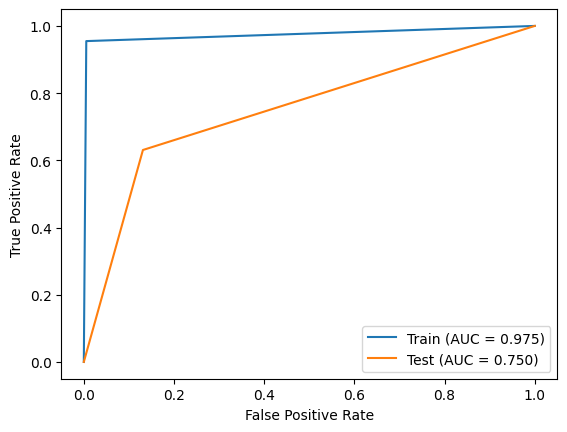

In [154]:
from sklearn.metrics import roc_auc_score, roc_curve
from matplotlib import pyplot as plt
# Compute the AUC score for the train set
auc_train = roc_auc_score(y_train, y_train_pred7)
# Compute the AUC score for the test set
auc_test = roc_auc_score(y_test, y_test_pred7)

# Compute the false positive rate and true positive rate for the train set
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred7)

# Compute the false positive rate and true positive rate for the test set
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_pred7)

# Plot the ROC curve for the train set
plt.plot(fpr_train, tpr_train, label="Train (AUC = {:.3f})".format(auc_train))

# Plot the ROC curve for the test set
plt.plot(fpr_test, tpr_test, label="Test (AUC = {:.3f})".format(auc_test))

# Add labels and a legend to the plot
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

# Show the plot
plt.show()

Inference for Best Model:

Bagging model performs the best with 95% train accuracy. And also have 96% precision and above 90% recall which is better than any other models that we have performed in here with the Election dataset. Rest all the models are more or less have same accuracy of 89%.

1.8 Based on these predictions, what are the insights? Dataset has 10 variables. Unnamed: 0 is serial number so we can drop that. We see that variable vote and gender contain string value . We know that modelling can not take string value.To perform the analysis , we will be converting string value to integer data type . Age refers to the person who have entered/ gained voting rights.The maximum economic condition of the nation falls under the moderate category.The maximum economic condition of the household goods falls under the moderate category.Blair is the labour leader. Model score for all the models seem to be similar for both the training and the testsets.AUC scores is also same for almost all the models.From the confusion matrix, we see that actual and predicted data are very close toeach other. This is the sign of right fit model4.We see even the F1 scores are almost same on all the models.Bagging and boosting gave out excellent results proving there is no overfitting orunderfitting.We see that Tuning the model has optimized the results for the training set and hencewe can consider this for ADA Boost.As per the models, and the best case scenario given accuracy of more than 83%, we can saythat in between 57 to 59% of seats are reserved for Labour party. In the worst case scenario, given accuracy of more than 82%, a minimum of in between 56 to 58% of seats are reserved for the Conservative Party.Considering other variables, in the model, we can say that there are multiple fence sitters who can vote for either of the parties by getting influenced from variousvariables in action.Out of voters choosing labour party, more than 50% are female and less than 49%% are male. Labour party can see to increase influence on males to increase its vote bank.

Problem 2: In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America: President Franklin D. Roosevelt in 1941 President John F. Kennedy in 1961 President Richard Nixon in 1973 2.1 Find the number of characters, words, and sentences for the mentioned documents.

2.1 Find the number of characters, words, and sentences for the mentioned documents.

In [155]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vasan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [156]:
nltk.download('inaugural')


[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\vasan\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


True

In [157]:
from nltk.corpus import inaugural


In [158]:
inaugural.fileids()


['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [159]:
# Create a list of tuples, each containing the name of a speech and the corresponding file name
speeches = [('Franklin D. Roosevelt', '1941-Roosevelt.txt'),
            ('John F. Kennedy', '1961-Kennedy.txt'),
            ('Richard Nixon', '1973-Nixon.txt')]

# Print the table header
print("{:20s} {:>10s} {:>10s} {:>10s}".format("Speech", "Chars", "Words", "Sentences"))

# Print a row for each speech
for name, file in speeches:
    speech = inaugural.raw(file)
    words = inaugural.words(file)
    sents = inaugural.sents(file)
    print("{:20s} {:10d} {:10d} {:10d}".format(name, len(speech), len(words), len(sents)))

Speech                    Chars      Words  Sentences
Franklin D. Roosevelt       7571       1536         68
John F. Kennedy            7618       1546         52
Richard Nixon              9991       2028         69


2.2 Remove all the stopwords from all three speeches.

In [160]:
FDR = inaugural.words('1941-Roosevelt.txt')
JFK = inaugural.words('1961-Kennedy.txt')
RNX = inaugural.words('1973-Nixon.txt')

In [161]:
import re 
import string 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stopwords = set(stopwords.words('english')+list(string.punctuation))
def remove_stopwords(array,stopwords):
    filtered = []
    for a in array:
        al = a.lower()
        if al not in stopwords and a!='--':
            filtered.append(al)
    return filtered
FDR_clean = remove_stopwords(FDR,stopwords)
JFK_clean = remove_stopwords(JFK,stopwords)
RNX_clean = remove_stopwords(RNX,stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vasan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [162]:
print("Number of words in Speech of President Franklin D. Roosevelt in 1941-after removal of stopwords are",len(FDR_clean))
print("Number of words in Speech of President John F. Kennedy in 1961-after removal of stopwords are",len(JFK_clean))
print("Number of words in Speech of President Richard Nixon in 1973-after removal of stopwords are",len(RNX_clean))

Number of words in Speech of President Franklin D. Roosevelt in 1941-after removal of stopwords are 632
Number of words in Speech of President John F. Kennedy in 1961-after removal of stopwords are 697
Number of words in Speech of President Richard Nixon in 1973-after removal of stopwords are 836


2.3 Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords).



In [166]:
from collections import Counter

# Function to find the word that occurred the most number of times
def highest3words(array):
    Ctr = Counter(array)
    most_occur = Ctr.most_common(1)
    return most_occur

# Assuming FDR_clean, JFK_clean, and Nixon_clean are lists of tokenized words from respective inaugural addresses

# Find the top word in Roosevelt's inaugural address
print("Top word which occurred the most number of times in the inaugural address of President Franklin D. Roosevelt in 1941 is", highest3words(FDR_clean))

# Find the top word in Kennedy's inaugural address
print("Top word which occurred the most number of times in the inaugural address of President John F. Kennedy in 1961 is", highest3words(JFK_clean))

# Find the top word in Nixon's inaugural address
print("Top word which occurred the most number of times in the inaugural address of President Richard Nixon in 1973 is", highest3words(Nixon_clean))

Top word which occurred the most number of times in the inaugural address of President Franklin D. Roosevelt in 1941 is [('the', 2)]
Top word which occurred the most number of times in the inaugural address of President John F. Kennedy in 1961 is [('ask', 1)]
Top word which occurred the most number of times in the inaugural address of President Richard Nixon in 1973 is [('silent', 2)]
